In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv('C://Projects//Movie Recommender System//Datasets//ratings_small.csv')

In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [4]:
ratings.dropna(inplace=True)

In [5]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [6]:
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_X,test_X = train_test_split(ratings, test_size=0.2)

In [9]:
train_X

,userId,movieId,rating,timestamp
96636,647,922,5.0,947292545
77527,537,230,4.0,879520728
82198,561,1247,4.5,1172696220
16623,105,4681,3.5,1085582146
15739,102,2132,5.0,956591576
...,...,...,...,...
44357,312,28,5.0,959934644
15827,102,2746,4.0,957980173
59619,431,1357,4.0,1165548562
78241,544,86345,5.0,1435787502


In [10]:
test_X

,userId,movieId,rating,timestamp
44018,311,3555,3.5,1076969077
55646,402,34048,3.0,1443393761
55722,402,74946,4.5,1462947912
16613,105,4479,4.0,1085579231
81743,558,2599,5.0,965485747
...,...,...,...,...
53842,388,1193,5.0,946887028
7456,48,2840,3.0,1412471725
83568,564,1498,3.0,974842838
52483,382,6367,1.0,1371827418


In [11]:
max_userid = ratings['userId'].drop_duplicates().max()
max_movieid = ratings['movieId'].drop_duplicates().max()

print(max_userid)
print(max_movieid)

671
163949


In [12]:
embedding_dimension = 32

In [31]:
#Movies Network
input_movies = tf.keras.layers.Input(shape=[1])
embed_movies = tf.keras.layers.Embedding(max_movieid + 1, embedding_dimension)(input_movies)
out_movies = tf.keras.layers.Flatten()(embed_movies)
#Users Network
input_users = tf.keras.layers.Input(shape=[1])
embed_users = tf.keras.layers.Embedding(max_userid + 1, embedding_dimension)(input_users)
out_users = tf.keras.layers.Flatten()(embed_users)

conc_layer = tf.keras.layers.Concatenate()([out_movies,out_users])
x = tf.keras.layers.Dense(128, activation='relu')(conc_layer)
x_out = tf.keras.layers.Dense(1, activation='relu')(x)

model = tf.keras.Model([input_movies,input_users], x_out)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error')

In [32]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 32)        5246400     input_3[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 32)        21504       input_4[0][0]                    
____________________________________________________________________________________________

In [33]:
hist = model.fit([train_X.movieId,train_X.userId], train_X.rating,
                 batch_size=64,epochs=15,
                 verbose=1,
                 validation_data= ([test_X.movieId,test_X.userId], test_X.rating))

Epoch 1/15
1251/1251 [==============================] - 85s 67ms/step - loss: 3.0798 - val_loss: 0.8217
Epoch 2/15
1251/1251 [==============================] - 83s 66ms/step - loss: 0.7485 - val_loss: 0.8088
Epoch 3/15
1251/1251 [==============================] - 82s 65ms/step - loss: 0.7010 - val_loss: 0.8009
Epoch 4/15
1251/1251 [==============================] - 81s 65ms/step - loss: 0.6770 - val_loss: 0.8019
Epoch 5/15
1251/1251 [==============================] - 82s 65ms/step - loss: 0.6470 - val_loss: 0.7976
Epoch 6/15
1251/1251 [==============================] - 84s 67ms/step - loss: 0.6175 - val_loss: 0.8059
Epoch 7/15
1251/1251 [==============================] - 84s 67ms/step - loss: 0.5895 - val_loss: 0.8078
Epoch 8/15
1251/1251 [==============================] - 84s 67ms/step - loss: 0.5723 - val_loss: 0.8197
Epoch 9/15
1251/1251 [==============================] - 82s 65ms/step - loss: 0.5467 - val_loss: 0.8311
Epoch 10/15
1251/1251 [==============================] - 82s 66m

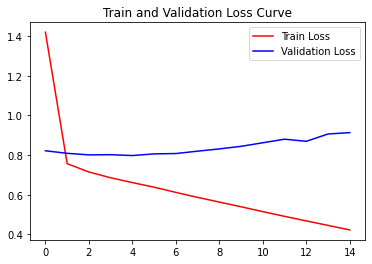

In [34]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve")
plt.legend()
plt.show()

In [35]:
#Extract embeddings

embedd = model.get_layer('embedding')
embedd_weights= embedd.get_weights()[0]
embedd_weights.shape

ValueError: No such layer: embedding.

In [24]:
merged_movies = pd.read_csv('Datasets//Rating_title_merged.csv')

In [19]:
merged_movies = merged_movies.set_index("id")

In [ ]:
merged_movies

In [ ]:
Movie_id =list(merged_movies.id.drop_duplicates())

dict_map = {}
for i in Movie_id:
    try:
        dict_map[i] = merged_movies.iloc[i]['title']
    except:
        continue
    
out_v = open('vecs.tsv', 'w')
out_m = open('meta.tsv', 'w')
for i in Movie_id:
    try:
        movie = dict_map[i]
        embeddings = embedd_weights[i]
        out_m.write(movie + "\n")
        out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
    except:
        continue

out_v.close()
out_m.close()

In [39]:
#Making recommendations for user 100
movie_arr = np.array(Movie_id) #get all book IDs
user = np.array([1 for i in range(len(Movie_id))])
pred = model.predict([movie_arr, user])
pred

array([[2.579938 ],
       [1.4530795],
       [3.9213607],
       ...,
       [2.7712343],
       [2.2147112],
       [2.4150655]], dtype=float32)

In [40]:
pred = pred.reshape(-1) #reshape to single dimension
pred_ids = (-pred).argsort()[0:5]
pred_ids

array([1650, 1707, 2226,  242, 1696], dtype=int64)

In [47]:
merged_movies['id'==[pred_ids]]

KeyError: False

In [42]:
movies = pd.read_csv('C://Projects//Movie Recommender System//Datasets//movies_metadata.csv')

C:\Users\Nihar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
movies.iloc[pred_ids]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1650,False,NaN,15000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",http://www.biglebowskibluray.com/splash.php,115,tt0118715,en,The Big Lebowski,"Jeffrey ""The Dude"" Lebowski, a Los Angeles sla...",...,1998-03-06,46189568.0,117.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Times like these call for a Big Lebowski.,The Big Lebowski,False,7.8,3001.0
1707,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,5910,tt0119250,ja,はなび,A police officer leaves the force in the face ...,...,1997-09-03,0.0,103.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Fireworks,False,7.6,118.0
2226,False,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,17037,tt0155753,en,I'll Be Home for Christmas,"Estranged from his father, college student Jak...",...,1998-11-12,0.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Somewhere between L.A. and N.Y. Jake found the...,I'll Be Home for Christmas,False,5.2,65.0
242,False,NaN,700000,"[{'id': 99, 'name': 'Documentary'}]",NaN,14275,tt0110057,en,Hoop Dreams,This documentary follows two inner-city Chicag...,...,1994-09-12,7830611.0,171.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An Extraordinary True Story.,Hoop Dreams,False,7.7,91.0
1696,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,47452,tt0119574,en,Love and Death on Long Island,Giles De'Ath is a widower who doesn't like any...,...,1997-01-01,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Love and Death on Long Island,False,6.9,11.0
